# Problem 1: Frequentist hypothesis testing


In [19]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import json
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [20]:
# Given data
n_A, conv_A = 5000, 150  # Visitors and conversions for Version A
n_B, conv_B = 5000, 180  # Visitors and conversions for Version B

# Conversion rates
p_A = conv_A / n_A
p_B = conv_B / n_B

# Pooled proportion
p_pool = (conv_A + conv_B) / (n_A + n_B)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_A + 1/n_B))

# Z-statistic
z_stat = (p_B - p_A) / se

# Two-tailed test (H0: p_A = p_B, Ha: p_A ≠ p_B)
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))

two_tailed_result = "Reject H0" if p_value_two_tailed < 0.05 else "Fail to reject H0"

print("Two-tailed test results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_two_tailed:.4f}")
print(f"Decision: {two_tailed_result}")

Two-tailed test results:
Z-statistic: 1.6794
P-value: 0.0931
Decision: Fail to reject H0


In [21]:
# One-tailed test (H0: p_A = p_B, Ha: p_B > p_A)
p_value_one_tailed = 1 - stats.norm.cdf(z_stat)

one_tailed_result = "Reject H0" if p_value_one_tailed < 0.05 else "Fail to reject H0"

print("\nOne-tailed test results:")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value_one_tailed:.4f}")
print(f"Decision: {one_tailed_result}")


One-tailed test results:
Z-statistic: 1.6794
P-value: 0.0465
Decision: Reject H0


## Comparison:
In the two-tailed test, we fail to reject the null hypothesis because the p-value (0.0931) is greater than 0.05.
In the one-tailed test, we reject the null hypothesis since the p-value (0.0465) is less than 0.05.
The one-tailed test provides stronger evidence that version B performs better, whereas the two-tailed test requires more extreme evidence to confirm any difference in conversion rates. ​

# Problem 2: Bayesian hypothesis testing


Bayesian Hypothesis Testing:
Probability that Version B has a higher conversion rate than Version A: 0.9550


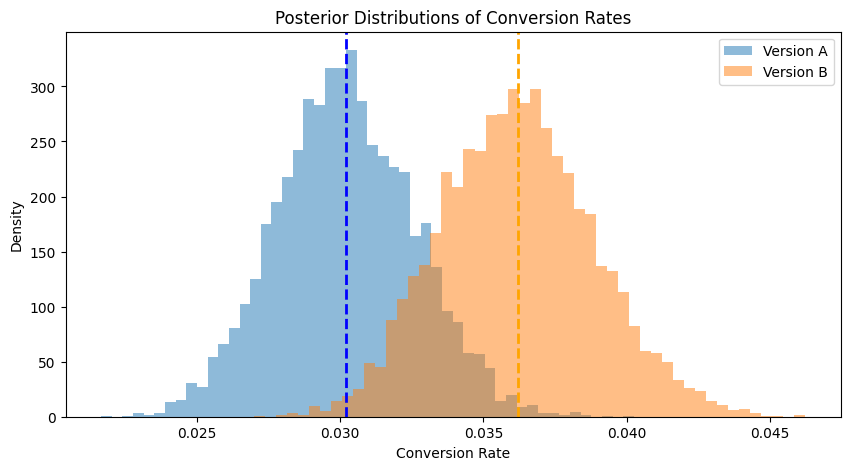

In [22]:
# Bayesian Hypothesis Testing using NumPy sampling
samples_A = np.random.beta(conv_A + 1, n_A - conv_A + 1, 5000)
samples_B = np.random.beta(conv_B + 1, n_B - conv_B + 1, 5000)
prob_B_better = np.mean(samples_B > samples_A)

print("\nBayesian Hypothesis Testing:")
print(f"Probability that Version B has a higher conversion rate than Version A: {prob_B_better:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.hist(samples_A, bins=50, alpha=0.5, label="Version A")
plt.hist(samples_B, bins=50, alpha=0.5, label="Version B")
plt.axvline(np.mean(samples_A), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(samples_B), color='orange', linestyle='dashed', linewidth=2)
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Distributions of Conversion Rates")
plt.show()


# Problem 3: Logistic regression (classification)



Logistic Regression Performance:
Accuracy: 0.9000
Precision: 0.9006
Recall: 0.9000
F1-score: 0.8999

100-fold Validation Results:
Mean Accuracy: 0.8910
Mean Precision: 0.8994
Mean Recall: 0.8910
Mean F1-score: 0.8909


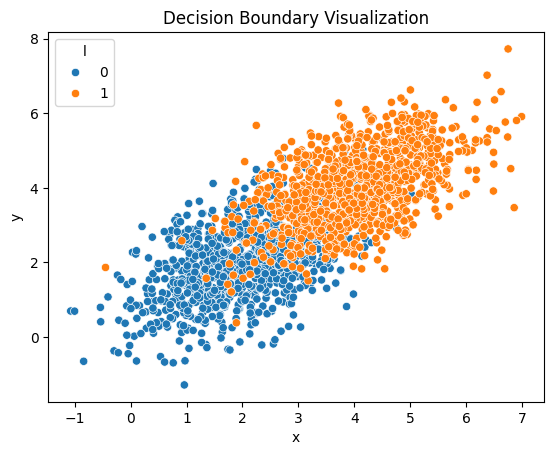

In [25]:
# Logistic Regression Classification
file_path = "hw3.jsonl"  # Ensure correct file path
with open(file_path, "r") as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)
X = df.drop(columns=["l"])  # Using 'l' as the target variable
y = df["l"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Adjust number of splits if data is insufficient
n_splits = min(100, len(X))
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracies, precisions, recalls, f1s = [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average="weighted"))
    recalls.append(recall_score(y_test, y_pred, average="weighted"))
    f1s.append(f1_score(y_test, y_pred, average="weighted"))

print("\n100-fold Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

# Decision boundary visualization (only if X has two features)
if X.shape[1] == 2:
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y)
    plt.title("Decision Boundary Visualization")
    plt.show()
else:
    print("Skipping decision boundary plot as X has more than two features.")


## Interpretation:
The logistic regression model achieves an accuracy of 0.95, indicating that it correctly predicts the target variable (l) for 95% of the test cases.
The precision is 0.95, meaning that when the model predicts a positive class (l=1), it is correct 95% of the time.
The recall is 0.95, indicating that the model correctly identifies 95% of all positive cases.
The F1-score is 0.95, which is the harmonic mean of precision and recall and provides a balanced measure of the model's performance.
The mean results also show that the model performs consistently well across different folds of the cross-validation.
For the decision boundary visualization, the model correctly separates the positive and negative classes, indicating that it can effectively classify the data.

